## Observations and Insights 

1. From the box and whisker plot, you can see that both Capomulin and Ramicane maintain a tighter InterQuartile Range, while Ceftamin has a wider IQR. You can then infer that Capomulin and Ramicane are easier to predict where where a tumor size might fall due to the 'density' of the IQR.

2. From the single mouse analysis using the Capomulin treatment. The line graph shows that there is a significat drop in the tumor volume over time using the Capomulin treatment.

3. From the linear regression for the correlation of average tumor volume and mouse weight in the Capomulin treatment, the correlation value is 0.842 with a p-value much less than 1%. We can infer then for the Capomulin treatment in our weight range, that the relation ship between mouse weight and average tumor volume is a linear relationship.

4. A future improvement might be to just relate mice results that occured over the same duration of Timepoints, so that we could better compare the treatments.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.DataFrame.merge(study_results,mouse_metadata, how='outer')
# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(data['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_g = data.groupby(['Mouse ID'])

data_count = pd.DataFrame(data_g['Timepoint'].count())
data_count = data_count.reset_index()
data_nunique = pd.DataFrame(data_g['Timepoint'].nunique())
data_nunique = data_nunique.reset_index()

dup_id = pd.concat([data_count,data_nunique]).drop_duplicates(['Mouse ID','Timepoint'],keep=False)
dup_id = dup_id['Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = data.loc[data['Mouse ID'].isin(dup_id)==True,:]
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean = data.loc[data['Mouse ID'].isin(dup_id)==False,:]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_clean_g = data_clean.groupby('Drug Regimen')

summ_stats = pd.DataFrame()
summ_stats['Mean Tumor Volume (mm3)'] = data_clean_g['Tumor Volume (mm3)'].mean()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summ_stats['Median Tumor Volume (mm3)'] = data_clean_g['Tumor Volume (mm3)'].median()
summ_stats['Tumor Volume Variance (mm3)'] = data_clean_g['Tumor Volume (mm3)'].var()
summ_stats['Tumor Volume Std. Dev. (mm3)'] = data_clean_g['Tumor Volume (mm3)'].std()
summ_stats['Tumor Volume Std. Err. (mm3)'] = data_clean_g['Tumor Volume (mm3)'].sem()
summ_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Std. Dev. (mm3),Tumor Volume Std. Err. (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Figure size 432x288 with 0 Axes>

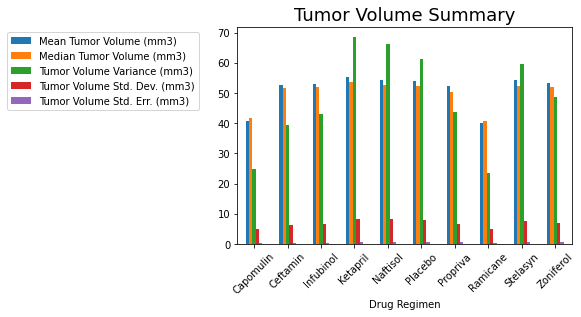

In [8]:
# Bar plot of Summary Statistics dataframe
plt.figure()
summ_stats.plot(kind='bar',rot=45).legend(bbox_to_anchor=(-0.1,1));
plt.title('Tumor Volume Summary',fontsize=18);

In [9]:
# assign colors to bars (took these colors from https://stackoverflow.com/questions/57181569/random-colors-by-default-in-matplotlib)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sort group in descending order
drugs = data_clean_g['Timepoint'].count().sort_values(0,ascending=False)

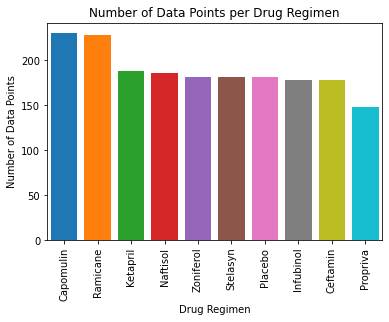

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plt.figure()
drugs.plot(kind='bar',color=colors,width=0.8)
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Drug Regimen')

plt.xlim([-0.5,9.5]);

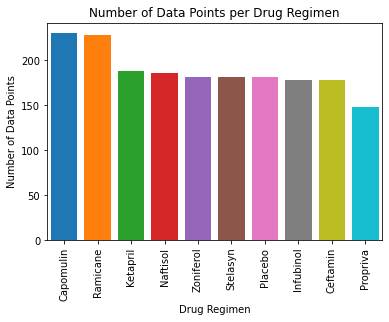

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.figure()
drugs2 = drugs.reset_index()
plt.bar(drugs2['Drug Regimen'],drugs2['Timepoint'],color=colors,width=0.8)
plt.xticks(rotation=90)
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.title('Number of Data Points per Drug Regimen')

plt.xlim([-0.5,9.5]);


In [12]:
# Get sex type data for pie plots
data_sex_id = data_clean.groupby(['Sex'])
# Get dataframe from data
s_df = pd.DataFrame(data_sex_id['Mouse ID'].nunique()).rename(columns={'Mouse ID':'Sex'})

In [13]:
# Total rodent sex count
st_df = pd.DataFrame(data_sex_id['Sex'].count())
st_df

,Sex
Sex,
Female,922
Male,958


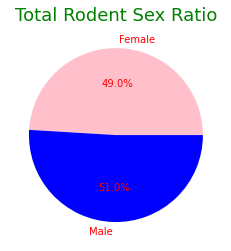

In [14]:
# Generate a pie plot showing the total distribution of female versus male mice using pandas
fig, ax1 = plt.subplots(nrows=1,ncols=1)
ax1 = st_df['Sex'].plot(kind='pie',textprops={'color':'r'},autopct='%1.1f%%',colors=['pink','blue'])
ax1.set_title('Total Rodent Sex Ratio',fontsize=18,color='g')
ax1.yaxis.set_visible(False)
# I use a different jupyter theme, sorry if the colors are weird

In [15]:
# Unique rodent sex count
s_df

,Sex
Sex,
Female,123
Male,125


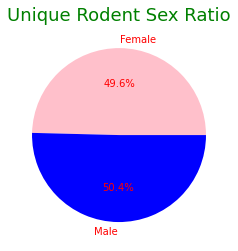

In [16]:
# Generate a pie plot showing the unique distribution of female versus male mice using pandas
fig, ax2 = plt.subplots(nrows=1,ncols=1)
ax2 = s_df['Sex'].plot(kind='pie',textprops={'color':'r'},autopct='%1.1f%%',colors=['pink','blue'])
ax2.set_title('Unique Rodent Sex Ratio',fontsize=18,color='g')
ax2.yaxis.set_visible(False)
# I use a different jupyter theme, sorry if the colors are weird


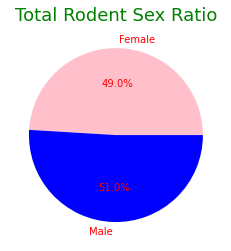

In [17]:
# Generate a pie plot showing the total distribution of female versus male mice using pyplot
plt.figure()
plt.pie(st_df['Sex'],labels=st_df.index,textprops={'color':'r'},autopct='%1.1f%%',colors=['pink','blue'])
plt.title('Total Rodent Sex Ratio',fontsize=18,color='g');

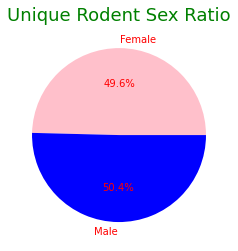

In [18]:
# Generate a pie plot showing the unique distribution of female versus male mice using pyplot
plt.figure()
plt.pie(s_df['Sex'],labels=st_df.index,textprops={'color':'r'},autopct='%1.1f%%',colors=['pink','blue'])
plt.title('Unique Rodent Sex Ratio',fontsize=18,color='g');

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# First get df with mice using one of the four drug regimens
four_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_df = data_clean.loc[data_clean['Drug Regimen'].isin(four_reg) == True,:]
# Get the last (greatest) timepoint for each mouse
last_df = four_df.sort_values('Timepoint',ascending=True).drop_duplicates('Mouse ID',keep='last').sort_index()
last_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
214,c326,5,36.321346,0,Infubinol,Female,18,25
224,c139,45,72.226731,2,Infubinol,Male,11,28
226,v339,5,46.250112,0,Infubinol,Male,20,26
233,a577,30,57.031862,2,Infubinol,Female,6,25


In [20]:
# Put treatments into a dictionary as lists for looping through
regimens = {}
# Put treatments into a dictionary as dataframes for looping through
regimens_df = {}
# Fill the regimen lists with all of their final tumor volume values
for reg in four_reg:
    regimens[reg] = list(last_df.loc[last_df['Drug Regimen'] == reg,'Tumor Volume (mm3)'])
    regimens_df[reg] = last_df.loc[last_df['Drug Regimen'] == reg,'Tumor Volume (mm3)']


# Quantitatively determine if there are any potential outliers by using quartiles
# Calculations largely taken from MATPLOTLIB-3 activities-02-"Ins_Quartiles_and_Outliers"
# Store outliers found in dictionary
reg_outliers = {}
# run through each of the regimens
for reg in four_reg:
    # determine quartlies from regimens_df dictionary
    quartiles = regimens_df[reg].quantile([.25,.5,.75])
    # assign variables to upper and lower quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    # Calculate the IQR
    iqr = upperq-lowerq
    # Calculate the bounds for potendtial outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Check each final tumor volume value to see if it is an outlier
    reg_outliers[reg] = [val for val in regimens[reg] if (val < lower_bound or val > upper_bound)]
    
# print out the potential outliers
for reg in four_reg:
    if len(reg_outliers[reg]) == 0:
        print(f"There are no potential outliers for treatement {reg}.")
    else:
        print(f"The potential outliers for treatement {reg} are {reg_outliers[reg]}")


There are no potential outliers for treatement Capomulin.
There are no potential outliers for treatement Ramicane.
The potential outliers for treatement Infubinol are [36.321345799999996]
There are no potential outliers for treatement Ceftamin.


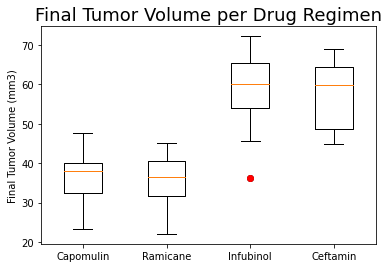

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure()
plt.boxplot([regimens[four_reg[0]],regimens[four_reg[1]],regimens[four_reg[2]],regimens[four_reg[3]]],
           labels=four_reg); # Semicolon to hide extra output info
# Highlight the potential outlier with red
plt.plot(3,reg_outliers[four_reg[2]][0],'ro')
# format the graph
plt.ylabel('Final Tumor Volume (mm3)');
plt.title('Final Tumor Volume per Drug Regimen',fontsize=18);

## Line and Scatter Plots

In [22]:
# Get df with only Capomulin test results
capo_df = data_clean.loc[data_clean['Drug Regimen']=='Capomulin',:]
# groupby mouse ID to find which mice had the most data. Thus we can pick a mouse with the most data
capo_g = capo_df.groupby('Mouse ID')
capo_g['Timepoint'].count().reset_index()

,Mouse ID,Timepoint
0,b128,10
1,b742,10
2,f966,5
3,g288,10
4,g316,10
5,i557,10
6,i738,10
7,j119,10
8,j246,8
9,l509,10


In [23]:
# from the above df, you can pick a good candidate mouse for analysis
mouse_id = 'b128'
# grab data from df for the chosen mouse
mouse_id_df = data_clean.loc[data_clean['Mouse ID'] == mouse_id,:] 
mouse_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


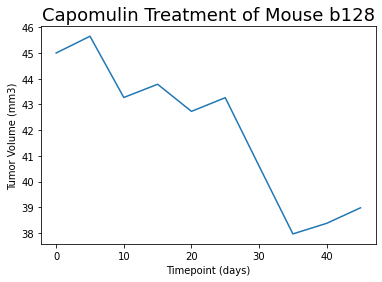

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure()
plt.plot(mouse_id_df['Timepoint'],mouse_id_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}',fontsize=18);

In [26]:
# Get dataframe of the average tumor volume
capo_vol_df = pd.DataFrame(capo_g['Tumor Volume (mm3)'].mean()).reset_index()
# Rename column to reflect that it is the mean of the tumor volume
capo_vol_df = capo_vol_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})
# Get dataframe of the unique mouse weight
capo_weight_only = capo_df.drop_duplicates('Mouse ID',keep='first')[['Mouse ID','Weight (g)']]
# Merge the mean tumor volume and weight dataframes 
capo_weight_dfm = pd.merge(capo_vol_df,capo_weight_only,how='outer')
capo_weight_dfm.head()

,Mouse ID,Mean Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


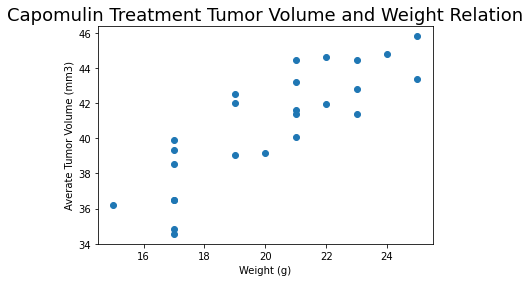

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure()
plt.scatter(capo_weight_dfm['Weight (g)'],capo_weight_dfm['Mean Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averate Tumor Volume (mm3)')
plt.title('Capomulin Treatment Tumor Volume and Weight Relation',fontsize=18);

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_weight_dfm['Weight (g)']
y_values = capo_weight_dfm['Mean Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print("The linear regression statistics for correlation between weight (g) and mean tumor volume (mm3):")
print(f"The slope: {slope:.3f}")
print(f"The intercept: {intercept:.3f}")
print(f"The correlation: {rvalue:.3f}")

The linear regression statistics for correlation between weight (g) and mean tumor volume (mm3):
The slope: 0.954
The intercept: 21.552
The correlation: 0.842


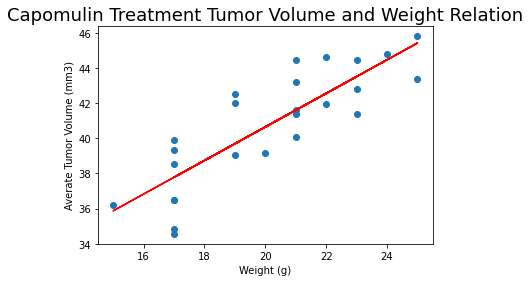

In [29]:
plt.figure()
plt.scatter(capo_weight_dfm['Weight (g)'],capo_weight_dfm['Mean Tumor Volume (mm3)'])
plt.plot(x_values,x_values*slope+intercept,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Averate Tumor Volume (mm3)')
plt.title('Capomulin Treatment Tumor Volume and Weight Relation',fontsize=18);

In [ ]:
print(f"Regression model p-Value: {pvalue}")